# **Internet Marketing - an insight**

**Business benifits**

*   Targetting the right audience
*   Predicting who is most likely to click the advertisment

**Project Goal**
*   Internet Usage visualization based on age, gender and countries





**Feedback**
1.
2. 

# Prepare the environment



In [ ]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from scipy.stats import norm

from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)

import folium


# Read and Examine the dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
#Loading
Advertising_data  = pd.read_csv('/content/drive/My Drive//DataScience_Project/Advertising/advertising.csv')
Advertising_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
Advertising_data.shape

(1000, 10)

In [ ]:
Advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
Advertising_data.describe()       

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Data Clean up








In [ ]:
#internet usage based on timestamp
Advertising_data['Timestamp']=pd.to_datetime(Advertising_data['Timestamp'])
Advertising_data.dtypes
Advertising_data.set_index('Timestamp',inplace=True)
Advertising_data['Month_Name']=Advertising_data.index.strftime('%B')
Advertising_data['Day']=Advertising_data.index.strftime('%A')
#Advertising_data = Advertising_data.drop(['City'], axis=1)



In [ ]:
Advertising_data.rename(columns = {'Male':'Gender'},inplace=True) 

In [ ]:
Advertising_data["Gender"].replace({1: "male", 0: "female"}, inplace=True)

In [ ]:
Advertising_data.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month_Name,Day
Timestamp,,,,,,,,,,,
2016-03-27 00:53:11,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,female,Tunisia,0,March,Sunday
2016-04-04 01:39:02,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,male,Nauru,0,April,Monday
2016-03-13 20:35:42,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,female,San Marino,0,March,Sunday
2016-01-10 02:31:19,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,male,Italy,0,January,Sunday
2016-06-03 03:36:18,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,female,Iceland,0,June,Friday
2016-05-19 14:30:17,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,male,Norway,0,May,Thursday
2016-01-28 20:59:32,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,female,Myanmar,0,January,Thursday
2016-03-07 01:40:15,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,male,Australia,1,March,Monday
2016-04-18 09:33:42,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,male,Grenada,0,April,Monday


# Analysis and visualization







In [ ]:

# Creates pandas DataFrame. 
df = Advertising_data[(Advertising_data['Clicked on Ad'] == 1)] 
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month_Name,Day
Timestamp,,,,,,,,,,,
2016-03-07 01:40:15,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,male,Australia,1,March,Monday
2016-03-16 20:19:01,47.64,49,45632.51,122.02,Centralized neutral neural-net,West Brandonton,female,Qatar,1,March,Wednesday
2016-06-03 01:14:41,69.57,48,51636.92,113.12,Centralized content-based focus group,West Katiefurt,male,Egypt,1,June,Friday
2016-03-24 09:31:49,42.95,33,30976.00,143.56,Grass-roots coherent extranet,West William,female,Barbados,1,March,Thursday
2016-03-09 03:41:30,63.45,23,52182.23,140.64,Persistent demand-driven interface,New Travistown,male,Spain,1,March,Wednesday


# Plotting graphs based on the criteria Ad clicked







Text(0, 0.5, 'Count')

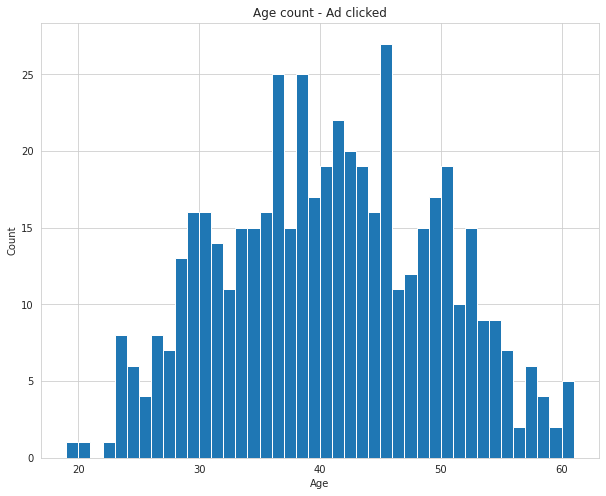

In [ ]:
#count of users based on age

plt.figure(figsize=(10, 8))
plt.title("Age count - Ad clicked")
df.Age.hist(bins=df.Age.nunique())
plt.xlabel('Age')
plt.ylabel("Count")

# Inference - The maximum number of users between Age group 35 - 45 have clicked on the Ad

<Figure size 864x216 with 0 Axes>

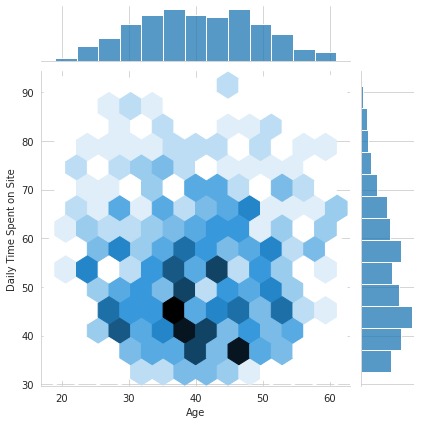

In [ ]:
# Ad Clicked - Join Plot based  on age and Time Spent on Site
plt.figure(figsize=(12,3))
sns.set_style("whitegrid");
sns.jointplot(x=df["Age"], y=df["Daily Time Spent on Site"], kind='hex')

# Inference - The users between the age group 35-45 who have clicked on the Ads seems to spent less time on the site. 

# Analysis Based on Month and Days







In [ ]:
df1= df.groupby(["Day"]).median()

# remove own index with default index 
df1.reset_index(inplace = True) 
df1.head(7)


,Day,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,Friday,51.300,41.0,49597.080,141.580,1.0
1,Monday,49.815,38.0,49060.270,151.385,1.0
2,Saturday,53.605,39.5,50713.365,135.615,1.0
3,Sunday,52.920,40.0,48462.500,138.695,1.0
4,Thursday,50.630,40.0,48246.600,137.430,1.0
5,Tuesday,53.680,39.0,50335.460,138.710,1.0
6,Wednesday,49.780,42.0,50199.770,133.900,1.0


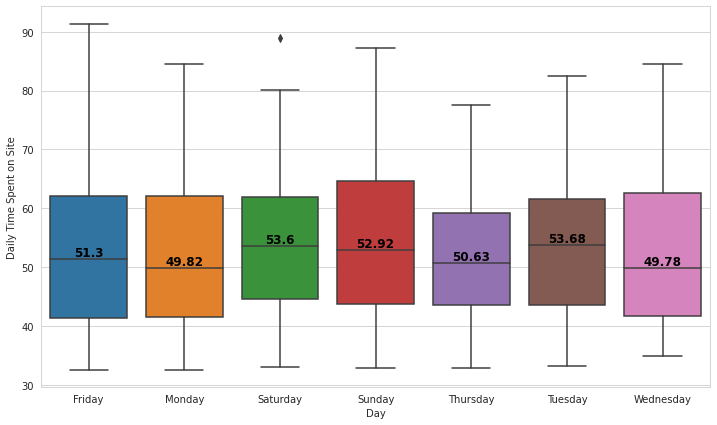

In [ ]:
#Ad clicked - Average time spent on the site based on days
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
ax = sns.boxplot(x="Day", y="Daily Time Spent on Site", data=df,order=[ 
                 'Friday', 'Monday', 'Saturday', 'Sunday','Thursday','Tuesday','Wednesday'])

medians = df.groupby(['Day'])['Daily Time Spent on Site'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))

for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='larger', color='black', weight='semibold',fontsize=12)

#Inference - The average Time spent by the user who clciked Ads comaritively seems to be higher during Weekends and Tuesday

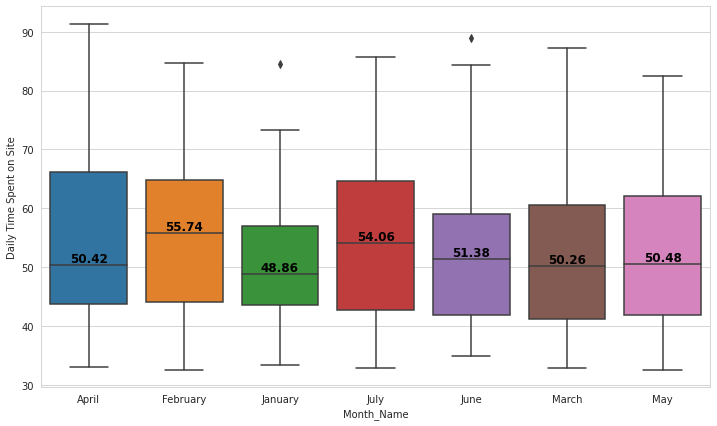

In [ ]:
#Ad clicked - Average time spent on the site based on months
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
ax = sns.boxplot(x="Month_Name", y="Daily Time Spent on Site", data=df,order=[ 
                 'April', 'February', 'January', 'July','June','March','May'])

medians = df.groupby(['Month_Name'])['Daily Time Spent on Site'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='larger', color='black', weight='semibold',fontsize=12)
#Inference - The average Time spent by the user who clciked Ads comparitively seems to be higher in the month of February and July

# Exploratory Data Analysis to understand when the Ads been clicked







/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


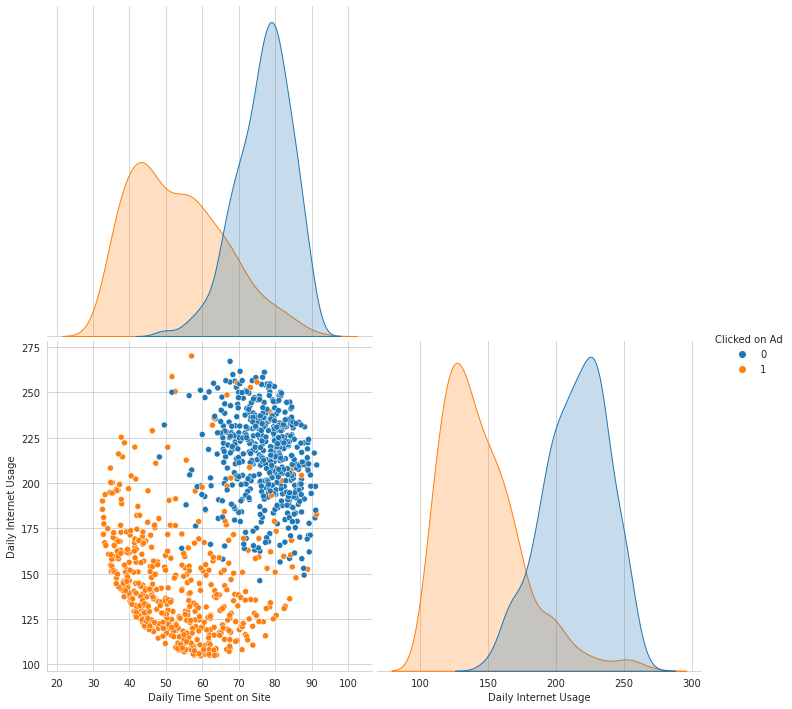

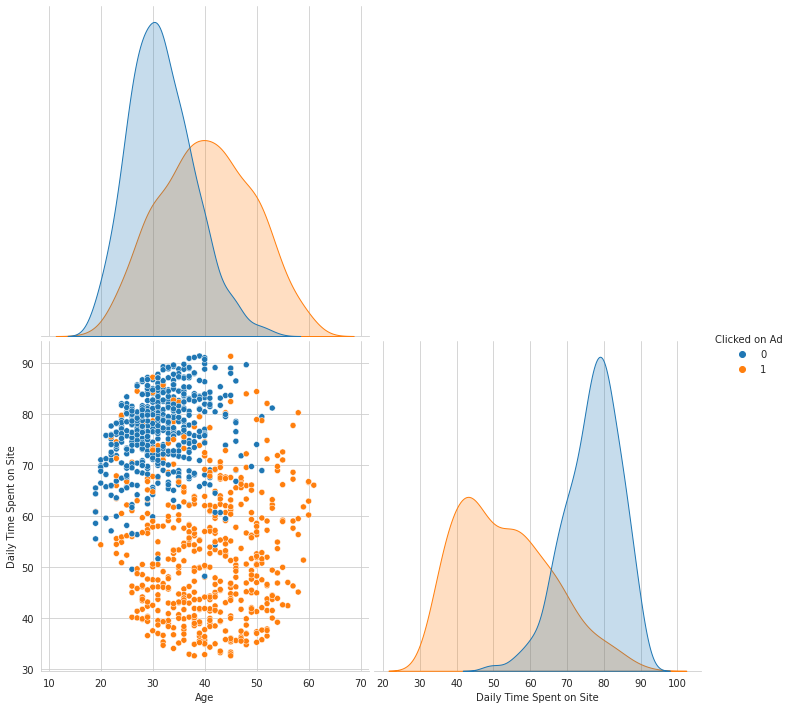

In [ ]:
#Exploratory data analysis 
sns.pairplot(data=Advertising_data[['Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']], hue='Clicked on Ad', corner=True,size=5 )
#sns.pairplot(data=Advertising_data[['Age','Area Income','Clicked on Ad']], hue='Clicked on Ad', corner=True,size=5 )
sns.pairplot(data=Advertising_data[['Age','Daily Time Spent on Site','Clicked on Ad']], hue='Clicked on Ad', corner=True,size=5 )
#Inference 1 - Users who spend less time on Site and with less Interent usage have clicked on the Ads
#Inference 2 - Users between age group between 35-45 and spending less time on Site have clicked on the Ads

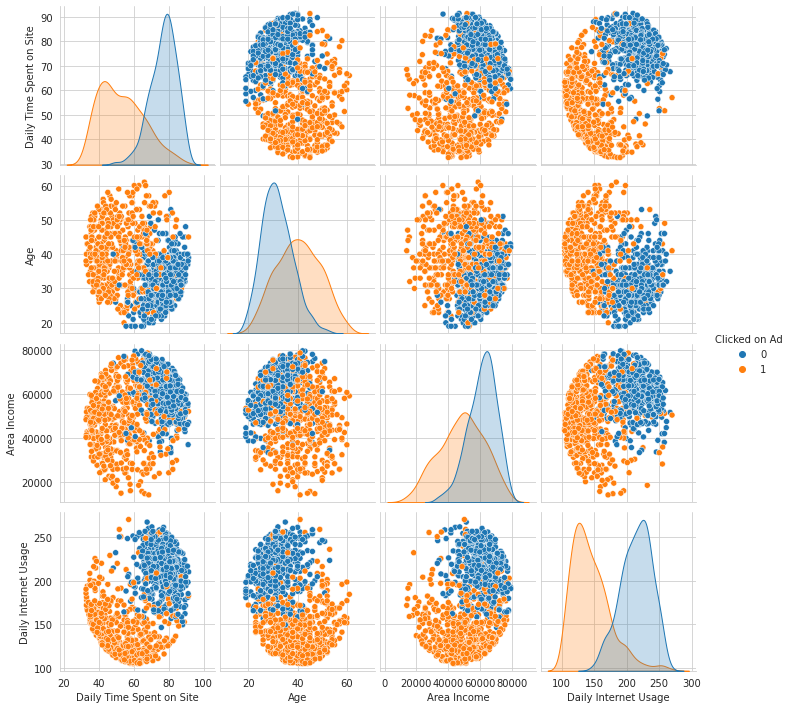

In [ ]:
sns.pairplot(Advertising_data, hue="Clicked on Ad")

# Gender Visualization







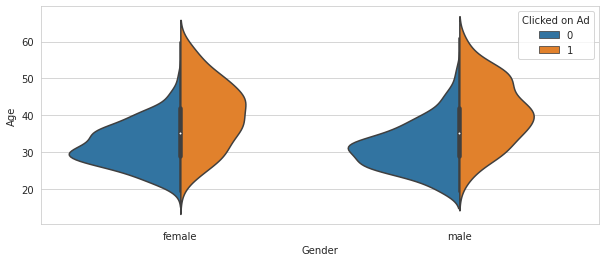

In [ ]:
 #Violinplot Displays distribution of the Ad Click based on gender  
# across all levels of a category. 

plt.figure(figsize=(10,4))
sns.violinplot(x ="Gender", y ="Age", hue ="Clicked on Ad",  
data = Advertising_data, split = True) 
# Inference - Gender wise the distirbution of Ad clicked and not clicked is similar and more concentrated areound the age 35-45

In [ ]:

# Plot 2 linear fits for male and female.
plt.figure(figsize=(10, 15))
sns.lmplot(y='Daily Time Spent on Site', x='Age', hue='Gender', data=df)
plt.xlim(25, 50)


In [ ]:
df['age_by_decade'] = pd.cut(x=df['Age'], bins=[20, 29, 39, 49, 59, 69], labels=['20s', '30s', '40s','50s','60s'])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month_Name,Day,age_by_decade
Timestamp,,,,,,,,,,,,
2016-03-07 01:40:15,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,male,Australia,1,March,Monday,40s
2016-03-16 20:19:01,47.64,49,45632.51,122.02,Centralized neutral neural-net,West Brandonton,female,Qatar,1,March,Wednesday,40s
2016-06-03 01:14:41,69.57,48,51636.92,113.12,Centralized content-based focus group,West Katiefurt,male,Egypt,1,June,Friday,40s
2016-03-24 09:31:49,42.95,33,30976.00,143.56,Grass-roots coherent extranet,West William,female,Barbados,1,March,Thursday,30s
2016-03-09 03:41:30,63.45,23,52182.23,140.64,Persistent demand-driven interface,New Travistown,male,Spain,1,March,Wednesday,20s


In [ ]:
sns.kdeplot(data=df, x="Age", hue="Gender", multiple="stack")

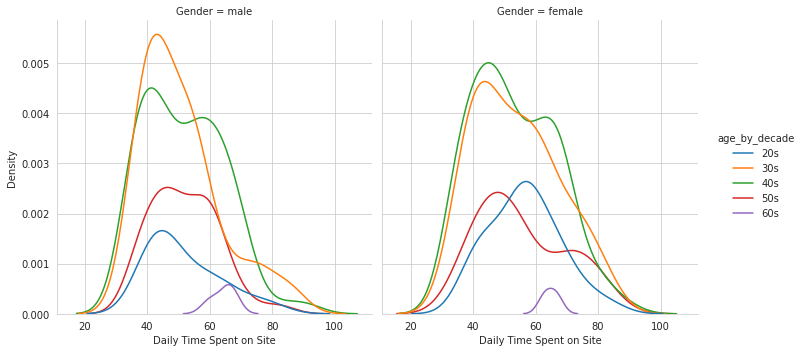

In [ ]:
sns.displot(data=df, x="Daily Time Spent on Site", hue="age_by_decade", col="Gender", kind="kde")
# Inference - Gender densitiy analysis reveals bothe MAle and Female between the age group 35-45 have cliceked on the Ad

# Analysis the income of the countries -  Ad Clicked







In [ ]:
df_country = df.groupby(["Country"]).sum()

# remove own index with default index 
df_country.reset_index(inplace = True) 
df_country.sort_values(by=['Area Income'],ascending=False)


,Country,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
194,Turkey,377.23,289,367216.00,966.27,7
59,Ethiopia,332.41,261,351501.09,929.49,7
176,South Africa,331.17,247,324515.75,915.70,6
11,Australia,413.32,308,321679.16,1067.68,7
87,Hungary,331.78,180,311165.58,760.82,5
...,...,...,...,...,...,...
119,Marshall Islands,43.16,35,25371.52,156.11,1
189,Togo,64.67,51,24316.61,138.35,1
156,Russian Federation,74.58,40,23821.72,135.51,1
161,Saint Lucia,47.74,33,22456.04,154.93,1


In [ ]:
#Area Income Visualization based on country
country_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
  hist_indicator = df_country.iloc[0]['Area Income']
# Setup a folium map at a high-level zoom

my_map = folium.Map(location=[100, 0], zoom_start=2.5,max_bounds=True)


#my_map = folium.Map(tiles=None,min_zoom=6, max_zoom=6, zoom_start=6)
attribute = ('&copy GeoBasis-DE /<a href="http://www.bkg.bund.de">BKG</a>')

folium.raster_layers.WmsTileLayer(url = 'https://sgx.geodatenzentrum.de/wms_webatlasde.light_grau?',
                                  layers='webatlasde.light_grau',
                                  fmt='image/png',
                                  attr=attribute,
                                  transparent=False).add_to(my_map)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
my_map.choropleth(geo_data=country_geo, data=df_country,
             columns=['Country', 'Area Income'],
             key_on='feature.properties.name',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)
my_map    

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
